## **Sentiment Analysis**

Sentiment Analysis is a natural language processing (NLP) technique used to determine whether a piece of text expresses a positive, negative, or neutral sentiment. It is widely used in various applications such as customer feedback analysis, social media monitoring, and market research. By classifying text based on the sentiment expressed, businesses and organizations can gain valuable insights into customer opinions, brand reputation, and public sentiment.

In this project, we classify movie reviews as positive or negative using a Naive Bayes classifier. 
This involves:

- **Text Preprocessing:** Tokenization, stop word removal, and stemming/lemmatization to clean and standardize the text data.
- **Feature Extraction:** Converting text data into numerical features using methods like Bag of Words (BoW) or Term Frequency-Inverse Document Frequency (TF-IDF).
- **Model Building:** Training a Naive Bayes classifier to predict the sentiment of movie reviews.
- **Evaluation:** Assessing the model's performance using metrics such as accuracy, precision, recall, and F1 score.


This project demonstrates the fundamentals of sentiment analysis and provides a solid foundation for more advanced NLP tasks.








#### Step 01: Perform EDA on the data

In [23]:
import pandas as pd
import os

def load_data(data_dir):
    data = []
    labels = []
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(data_dir, label_type)
        for fname in os.listdir(dir_name):
            if fname.endswith('.txt'):
                with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                    data.append(f.read())
                labels.append(0 if label_type == 'neg' else 1)
    return pd.DataFrame({'review': data, 'label': labels})

# Load the dataset
data_dir = r"C:\Users\hitar\OneDrive\Desktop\Projects\50 days of NLP\2. Sentiment Analysis\Movie Reviews\train"
df = load_data(data_dir)
df.head()

,review,label
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0


In [2]:
# Data check

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()


review    0
label     0
dtype: int64
96


c:\Users\hitar\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hitar\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


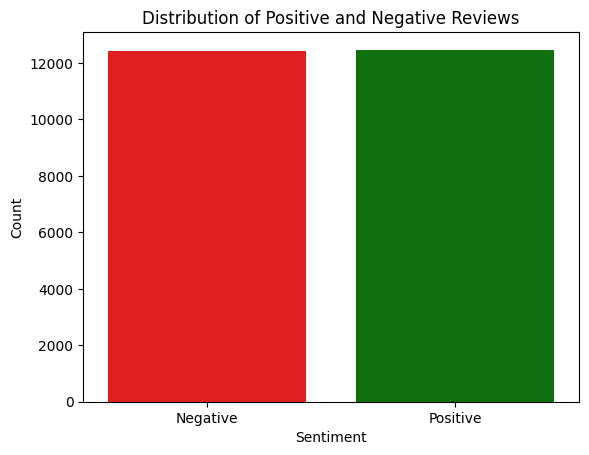

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom palette: red for 0 (Negative) and green for 1 (Positive)
custom_palette = {0: 'red', 1: 'green'}

# Plot the distribution of sentiments
sns.countplot(x='label', data=df, hue='label', palette=custom_palette, dodge=False)
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()


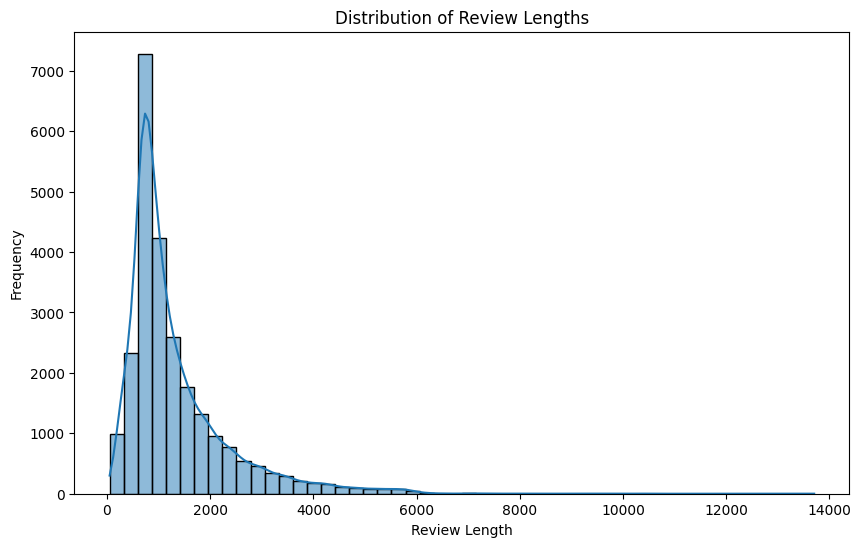

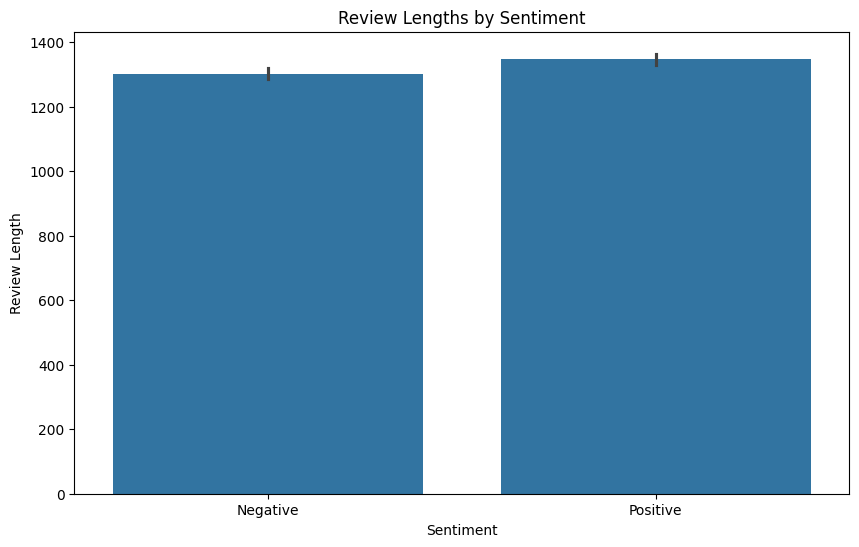

In [24]:
# review length analysis

# Add a column for review length
df['review_length'] = df['review'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Compare review lengths between positive and negative reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='review_length', data=df)
plt.title('Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

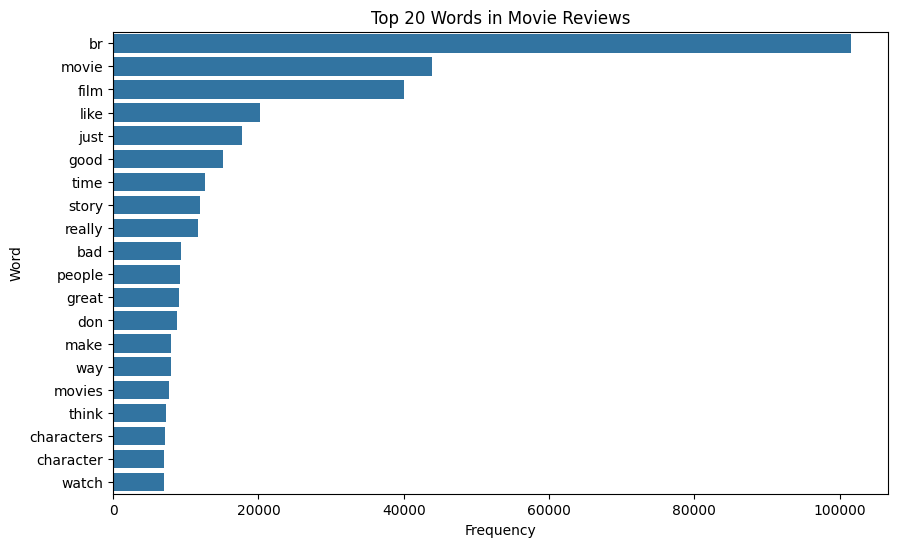

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 words
top_words = get_top_n_words(df['review'], 20)
top_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plot the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_df)
plt.title('Top 20 Words in Movie Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


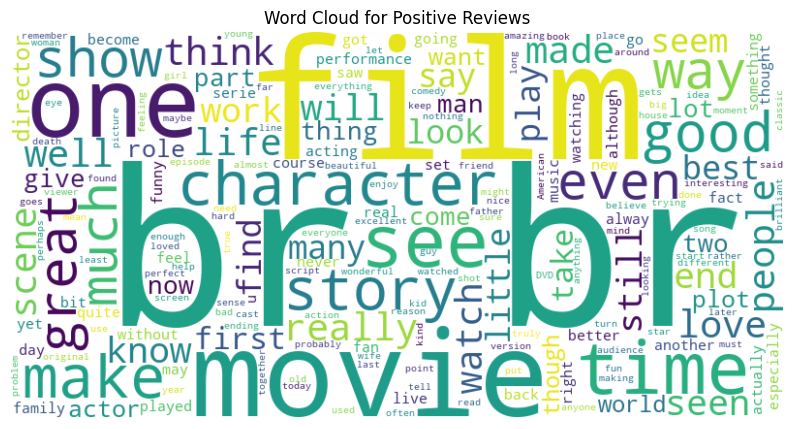

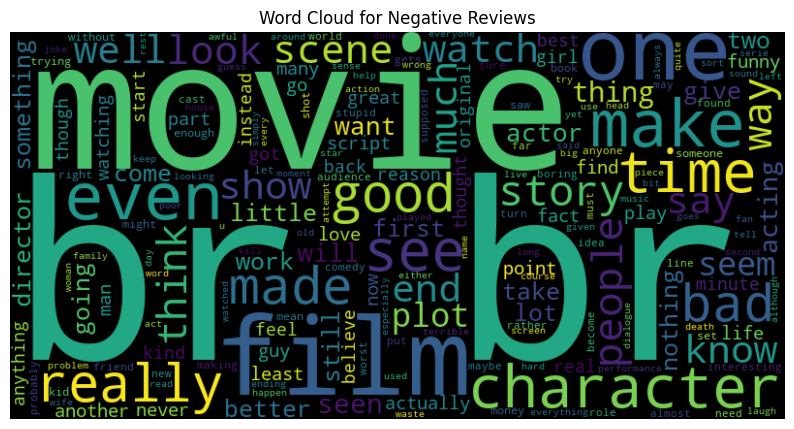

In [6]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative reviews
pos_reviews = ' '.join(df[df['label'] == 1]['review'])
neg_reviews = ' '.join(df[df['label'] == 0]['review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(neg_reviews)

# Plot word clouds
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

### **Step 02 Text Processing**

In [15]:
# Importing all the necessary libraires
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [25]:
df.head()

,review,label,review_length
0,Story of a man who has unnatural feelings for ...,0,655
1,Airport '77 starts as a brand new luxury 747 p...,0,4466
2,This film lacked something I couldn't put my f...,0,807
3,"Sorry everyone,,, I know this is supposed to b...",0,862
4,When I was little my parents took me along to ...,0,2326


In [26]:
#Step 01: Lowercasing

# Convert text to lowercase
df['cleaned_review'] = df['review'].str.lower()

In [27]:
#Step 02: Remove Hastags
# Function to remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

# Apply the function to the dataframe
df['cleaned_review'] = df['cleaned_review'].apply(remove_html_tags)

In [28]:
#Step 03: Removing special characters and numbers

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Apply the function to the dataframe
df['cleaned_review'] = df['cleaned_review'].apply(remove_special_characters)


In [29]:
# Step 04: Tokenize

df["tokens"] = df["cleaned_review"].apply(word_tokenize)

In [30]:
#Step 05: Stop Word Removal

# Remove stop words
stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stop_words)

In [31]:
# Step 06: Apply lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_words)


In [32]:
df.head()

,review,label,review_length,cleaned_review,tokens,lemmatized_tokens
0,Story of a man who has unnatural feelings for ...,0,655,story of a man who has unnatural feelings for ...,"[story, man, unnatural, feelings, pig, starts,...","[story, man, unnatural, feeling, pig, start, o..."
1,Airport '77 starts as a brand new luxury 747 p...,0,4466,airport starts as a brand new luxury plane i...,"[airport, starts, brand, new, luxury, plane, l...","[airport, start, brand, new, luxury, plane, lo..."
2,This film lacked something I couldn't put my f...,0,807,this film lacked something i couldnt put my fi...,"[film, lacked, something, couldnt, put, finger...","[film, lacked, something, couldnt, put, finger..."
3,"Sorry everyone,,, I know this is supposed to b...",0,862,sorry everyone i know this is supposed to be a...,"[sorry, everyone, know, supposed, art, film, w...","[sorry, everyone, know, supposed, art, film, w..."
4,When I was little my parents took me along to ...,0,2326,when i was little my parents took me along to ...,"[little, parents, took, along, theater, see, i...","[little, parent, took, along, theater, see, in..."


### **Step 03: Feature Extraction**

In [33]:
# BagOfWord(BOW)

from sklearn.feature_extraction.text import CountVectorizer

# Join the lemmatized tokens back into a single string
df['lemmatized_review'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the lemmatized reviews
X_bow = vectorizer.fit_transform(df['lemmatized_review'])

# Convert to DataFrame for better visualization
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
print(df_bow.head())



   ability  able  absolutely  accent  across  act  acted  acting  action  \
0        0     0           0       0       0    0      0       0       0   
1        0     0           0       0       0    0      0       1       1   
2        0     0           0       0       1    0      0       0       0   
3        0     0           0       0       0    0      0       0       0   
4        1     0           0       0       0    0      0       0       0   

   actor  ...  year  yes  yet  york  youll  young  younger  youre  youve  \
0      0  ...     0    0    0     0      0      0        0      0      0   
1      0  ...     0    0    0     0      0      0        0      0      0   
2      2  ...     0    0    0     0      0      0        0      0      0   
3      0  ...     0    0    0     0      0      0        0      0      0   
4      0  ...     0    0    0     0      0      0        0      1      0   

   zombie  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 100

In [34]:
#TF-IDF with Lemmatized Tokens

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the lemmatized reviews
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# Convert to DataFrame for better visualization
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(df_tfidf.head())


    ability  able  absolutely  accent    across  act  acted    acting  \
0  0.000000   0.0         0.0     0.0  0.000000  0.0    0.0  0.000000   
1  0.000000   0.0         0.0     0.0  0.000000  0.0    0.0  0.035291   
2  0.000000   0.0         0.0     0.0  0.179209  0.0    0.0  0.000000   
3  0.000000   0.0         0.0     0.0  0.000000  0.0    0.0  0.000000   
4  0.117602   0.0         0.0     0.0  0.000000  0.0    0.0  0.000000   

     action     actor  ...  year  yes  yet  york  youll  young  younger  \
0  0.000000  0.000000  ...   0.0  0.0  0.0   0.0    0.0    0.0      0.0   
1  0.046164  0.000000  ...   0.0  0.0  0.0   0.0    0.0    0.0      0.0   
2  0.000000  0.216725  ...   0.0  0.0  0.0   0.0    0.0    0.0      0.0   
3  0.000000  0.000000  ...   0.0  0.0  0.0   0.0    0.0    0.0      0.0   
4  0.000000  0.000000  ...   0.0  0.0  0.0   0.0    0.0    0.0      0.0   

      youre  youve  zombie  
0  0.000000    0.0     0.0  
1  0.000000    0.0     0.0  
2  0.000000    0.0     

In [35]:
# Split Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df['label'], test_size=0.2, random_state=42)


In [36]:
# train the naive bayes classifier

from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [37]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8238
Precision: 0.8148
Recall: 0.8354
F1 Score: 0.8250

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2515
           1       0.81      0.84      0.82      2485

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000


Confusion Matrix:
[[2043  472]
 [ 409 2076]]


## Conclusion

In this project, I set out to perform sentiment analysis on movie reviews using a Naive Bayes classifier with TF-IDF features. The objective was to classify reviews as positive or negative and evaluate the model's performance using various metrics.

### Key Findings

- The sentiment analysis model achieved an accuracy of 82.38%, with a precision of 81.48%, recall of 83.54%, and F1 score of 82.50%. These metrics indicate that the model performs well in distinguishing between positive and negative sentiments in movie reviews.

### Model Performance

- The confusion matrix reveals that the model correctly classified 2043 negative reviews and 2076 positive reviews. It also misclassified 472 negative reviews as positive and 409 positive reviews as negative.

### Limitations and Future Work

- Despite the model's solid performance, it faces challenges such as data imbalance and potential biases in sentiment labeling. Future improvements could involve gathering more diverse data, experimenting with ensemble methods, or integrating domain-specific features.

### Broader Implications

- Sentiment analysis of movie reviews has practical applications in understanding audience preferences, improving marketing strategies, and enhancing customer satisfaction in the entertainment industry.

### Conclusion

This project has provided valuable insights into the application of natural language processing techniques for sentiment analysis. It underscores the importance of robust preprocessing, effective feature extraction, and model evaluation in building reliable text classification systems.
